In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
diamonds_df = pd.read_csv('diamonds.csv')
diamonds_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<Axes: xlabel='carat', ylabel='Count'>

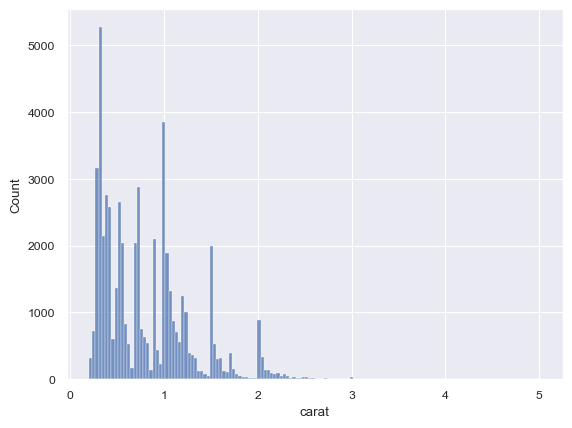

In [5]:
sns.set(context= "paper")
sns.histplot(diamonds_df.carat)


<Axes: xlabel='carat', ylabel='Count'>

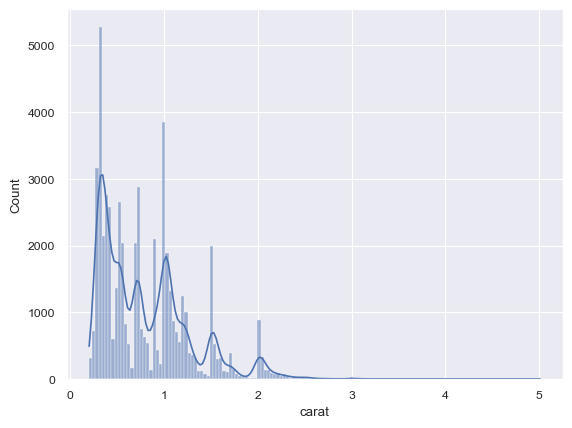

In [6]:
sns.histplot(diamonds_df.carat, kde= True)

<Axes: xlabel='carat', ylabel='Count'>

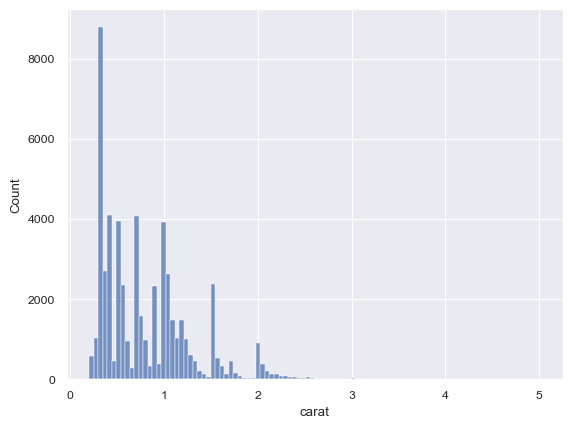

In [9]:
sns.histplot(diamonds_df.carat, kde = False, bins = 100)

Text(0.5, 1.0, 'Diamond carat histogram')

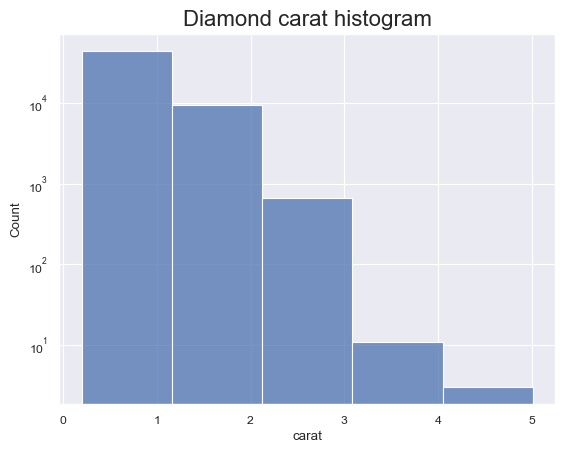

In [11]:
ax = sns.histplot(diamonds_df.carat, kde= False, bins = 5)
ax.set_yscale('log')
plt.title("Diamond carat histogram", fontsize=16)

[]

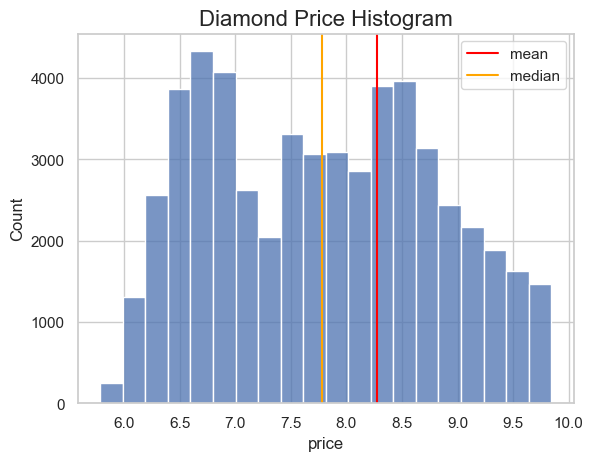

In [12]:
import numpy as np
sns.set(context= "paper")
sns.set(style="whitegrid")

ax = sns.histplot(np.log(diamonds_df.price), bins = 20)
plt.axvline(x= np.log(np.mean(diamonds_df.price)),
            color = 'red',
            label = 'mean')

plt.axvline(x = np.log(np.median(diamonds_df.price)),
            color = 'orange',
            label = 'median')

plt.legend(loc = 'upper right')
plt.title("Diamond Price Histogram", fontsize=16)
plt.plot()

In [13]:
diamonds_df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [14]:
diamonds_df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [15]:
cut_count_table = pd.crosstab(index= diamonds_df['cut'],columns='count')
cut_count_table

col_0,count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


Text(0.5, 1.0, 'Diamonds Cut Bar Chart')

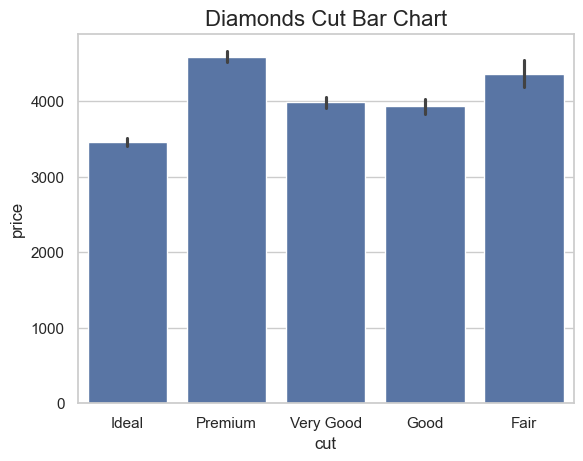

In [18]:
from numpy import median,mean
sns.set(style="whitegrid")
ax = sns.barplot(x = 'cut',
                 y = 'price',
                 data = diamonds_df,
                 estimator= mean,
                 order=['Ideal','Premium','Very Good','Good','Fair'])
plt.title("Diamonds Cut Bar Chart", fontsize = 16)

In [19]:
ideal_group = diamonds_df.loc[diamonds_df['cut'] == 'Ideal']
x = ideal_group.index.tolist()[0]
y = len(ideal_group)

print(x)
print(y)

0
21551


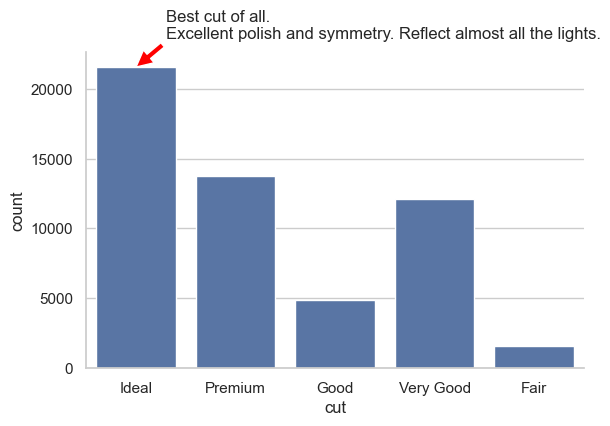

In [20]:
ax = sns.catplot(x = 'cut',
                 data= diamonds_df,
                 aspect=1.5,
                 kind='count',
                 height=4)
plt.annotate("Best cut of all. \nExcellent polish and symmetry. Reflect almost all the lights.",
             xy= (x,y),
             xytext= (x + 0.3, y+2000),
             arrowprops= dict(facecolor = 'red'))
plt.show()


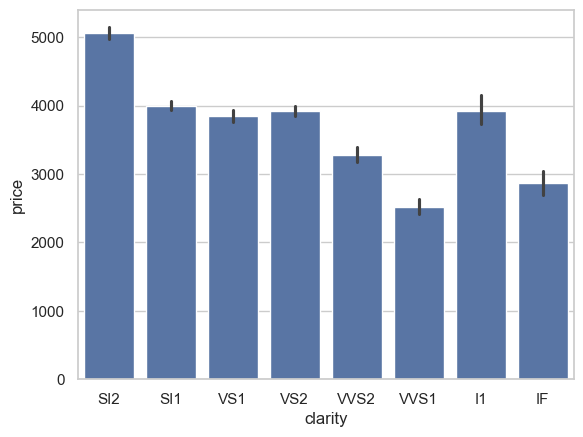

In [21]:
from numpy import median, mean
sns.set(style="whitegrid")
ax = sns.barplot(x = 'clarity',
                 y = 'price',
                 data = diamonds_df,
                 estimator= mean
                 )

In [23]:
diamonds_df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [24]:
diamonds_df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

TypeError: Artist.set_label() got an unexpected keyword argument 'fontdict'

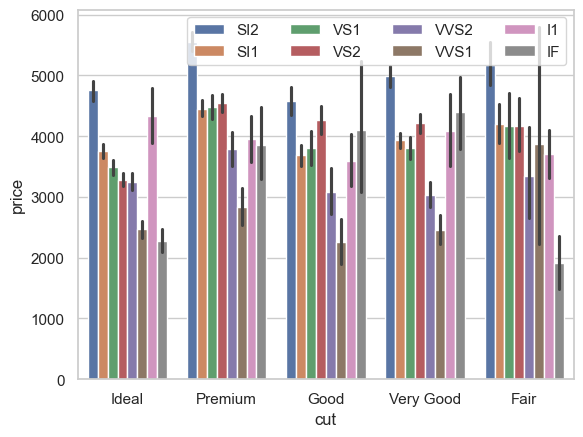

In [ ]:
ax = sns.barplot(x='cut',
                 y='price',
                 hue='clarity',
                 data=diamonds_df)
ax.legend(loc = 'upper right', ncol=4)
ax.set_label('cut',fontdict = {'fontsize':15})
ax.set_ylabel('Price',fontdict= {'fontsize':15})
ax.set_xticklabels(ax.get_xticklabels(),fontsize = 13, rotation = 30)